In this notebook, we used the model trained in an 'add then concatenate' configuration to compare individual and consolidated models' AUPRC values

In [1]:
import pickle
import json
import pandas as pd
import numpy as np
from ML_utils import ML_utils

import warnings

# Silencing all UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)

# Your code that triggers the warning

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.dpi'] = 500 # Resolution of figures
plt.rcParams["figure.autolayout"] = True
plt.rcParams["legend.loc"] = 'best'
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

#### Specify and read in performance results of individual models

In [3]:
indiv_rule_02_03_model_results_path = '../../models/performance_results/rule0002_rule0003_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_04_05_model_results_path = '../../models/performance_results/all_Monox_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_06_07_model_results_path = '../../models/performance_results/rule0006_rule0007_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_08_09_model_results_path = '../../models/performance_results/rule0008_rule0009_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_14_15_model_results_path = '../../models/performance_results/rule0014_rule0015_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_16_17_model_results_path = '../../models/performance_results/rule0016_rule0017_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_18_model_results_path = '../../models/performance_results/rule0018_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_19_20_model_results_path = '../../models/performance_results/rule0019_rule0020_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_21_22_model_results_path = '../../models/performance_results/rule0021_rule0022_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_23_24_model_results_path = '../../models/performance_results/rule0023_rule0024_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_25_26_model_results_path = '../../models/performance_results/rule0025_rule0026_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_27_model_results_path = '../../models/performance_results/rule0027_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_28_model_results_path = '../../models/performance_results/rule0028_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_29_model_results_path = '../../models/performance_results/rule0029_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_30_31_model_results_path = '../../models/performance_results/rule0030_rule0031_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_32_model_results_path = '../../models/performance_results/rule0032_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_35_model_results_path = '../../models/performance_results/rule0035_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_36_37_model_results_path = '../../models/performance_results/rule0036_rule0037_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_38_39_model_results_path = '../../models/performance_results/rule0038_rule0039_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_40_model_results_path = '../../models/performance_results/rule0040_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_41_42_model_results_path = '../../models/performance_results/rule0041_rule0042_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_44_45_model_results_path = '../../models/performance_results/rule0044_rule0045_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_49_50_model_results_path = '../../models/performance_results/rule0049_rule0050_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_51_53_model_results_path = '../../models/performance_results/rule0051_rule0053_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_52_54_model_results_path = '../../models/performance_results/rule0052_rule0054_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_65_model_results_path = '../../models/performance_results/rule0065_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_66_67_model_results_path = '../../models/performance_results/rule0066_rule0067_ecfp4_XGBoost_4_add_concat_val_performance_results.json'
indiv_rule_68_77_model_results_path = '../../models/performance_results/rule0068_rule0077_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_69_model_results_path = '../../models/performance_results/rule0069_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_70_71_model_results_path = '../../models/performance_results/rule0070_rule0071_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_72_73_model_results_path = '../../models/performance_results/rule0072_rule0073_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_75_76_model_results_path = '../../models/performance_results/rule0075_rule0076_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_74_78_model_results_path = '../../models/performance_results/rule0074_rule0078_ecfp4_XGBoost_4_add_concat_test_performance_results.json'
indiv_rule_79_model_results_path = '../../models/performance_results/rule0079_ecfp4_XGBoost_4_add_concat_test_performance_results.json'

In [4]:
with open(indiv_rule_02_03_model_results_path, 'r') as file:
    rule_02_03_indiv_model_results = json.load(file)
    
with open(indiv_rule_04_05_model_results_path,'r') as file:
    rule_04_05_indiv_model_results = json.load(file)

with open(indiv_rule_06_07_model_results_path, 'r') as file:
    rule_06_07_indiv_model_results = json.load(file)
    
with open(indiv_rule_08_09_model_results_path, 'r') as file:
    rule_08_09_indiv_model_results = json.load(file)

with open(indiv_rule_14_15_model_results_path,'r') as file:
    rule_14_15_indiv_model_results = json.load(file)

with open(indiv_rule_16_17_model_results_path,'r') as file:
    rule_16_17_indiv_model_results = json.load(file)
    
with open(indiv_rule_18_model_results_path,'r') as file:
    rule_18_indiv_model_results = json.load(file)
    
with open(indiv_rule_19_20_model_results_path,'r') as file:
    rule_19_20_indiv_model_results = json.load(file)
    
with open(indiv_rule_21_22_model_results_path,'r') as file:
    rule_21_22_indiv_model_results = json.load(file)
    
with open(indiv_rule_23_24_model_results_path, 'r') as file:
    rule_23_24_indiv_model_results = json.load(file)
    
with open(indiv_rule_25_26_model_results_path, 'r') as file:
    rule_25_26_indiv_model_results = json.load(file)
    
with open(indiv_rule_27_model_results_path,'r') as file:
    rule_27_indiv_model_results = json.load(file)
    
with open(indiv_rule_28_model_results_path,'r') as file:
    rule_28_indiv_model_results = json.load(file)
    
with open(indiv_rule_29_model_results_path,'r') as file:
    rule_29_indiv_model_results = json.load(file)
    
with open(indiv_rule_30_31_model_results_path, 'r') as file:
    rule_30_31_indiv_model_results = json.load(file)
    
with open(indiv_rule_32_model_results_path,'r') as file:
    rule_32_indiv_model_results = json.load(file)
    
with open(indiv_rule_35_model_results_path,'r') as file:
    rule_35_indiv_model_results = json.load(file)
    
with open(indiv_rule_36_37_model_results_path,'r') as file:
    rule_36_37_indiv_model_results = json.load(file)
    
with open(indiv_rule_38_39_model_results_path,'r') as file:
    rule_38_39_indiv_model_results = json.load(file)
    
with open(indiv_rule_40_model_results_path,'r') as file:
    rule_40_indiv_model_results = json.load(file)
    
with open(indiv_rule_41_42_model_results_path,'r') as file:
    rule_41_42_indiv_model_results = json.load(file)
    
with open(indiv_rule_44_45_model_results_path,'r') as file:
    rule_44_45_indiv_model_results = json.load(file)
    
with open(indiv_rule_49_50_model_results_path,'r') as file:
    rule_49_50_indiv_model_results = json.load(file)
    
with open(indiv_rule_51_53_model_results_path,'r') as file:
    rule_51_53_indiv_model_results = json.load(file)
    
with open(indiv_rule_52_54_model_results_path,'r') as file:
    rule_52_54_indiv_model_results = json.load(file)
    
with open(indiv_rule_65_model_results_path,'r') as file:
    rule_65_indiv_model_results = json.load(file)
    
with open(indiv_rule_66_67_model_results_path,'r') as file:
    rule_66_67_indiv_model_results = json.load(file)
    
with open(indiv_rule_68_77_model_results_path,'r') as file:
    rule_68_77_indiv_model_results = json.load(file)
    
with open(indiv_rule_69_model_results_path,'r') as file:
    rule_69_indiv_model_results = json.load(file)
    
with open(indiv_rule_70_71_model_results_path,'r') as file:
    rule_70_71_indiv_model_results = json.load(file)
    
with open(indiv_rule_72_73_model_results_path,'r') as file:
    rule_72_73_indiv_model_results = json.load(file)
    
with open(indiv_rule_75_76_model_results_path,'r') as file:
    rule_75_76_indiv_model_results = json.load(file)
    
with open(indiv_rule_74_78_model_results_path,'r') as file:
    rule_74_78_indiv_model_results = json.load(file)
    
with open(indiv_rule_79_model_results_path,'r') as file:
    rule_79_indiv_model_results = json.load(file)

In [5]:
indiv_model_scores = [rule_02_03_indiv_model_results['mean AUPRC'],
                      rule_04_05_indiv_model_results['mean AUPRC'],
                      rule_06_07_indiv_model_results['mean AUPRC'],
                      rule_08_09_indiv_model_results['mean AUPRC'],
                      rule_14_15_indiv_model_results['mean AUPRC'],
                      rule_16_17_indiv_model_results['mean AUPRC'],
                      rule_18_indiv_model_results['mean AUPRC'],
                      rule_19_20_indiv_model_results['mean AUPRC'],
                      rule_21_22_indiv_model_results['mean AUPRC'],
                      rule_23_24_indiv_model_results['mean AUPRC'],
                      rule_25_26_indiv_model_results['mean AUPRC'],
                      rule_27_indiv_model_results['mean AUPRC'],
                      rule_28_indiv_model_results['mean AUPRC'],
                      rule_29_indiv_model_results['mean AUPRC'],
                      rule_30_31_indiv_model_results['mean AUPRC'],
                      rule_32_indiv_model_results['mean AUPRC'],
                      rule_35_indiv_model_results['mean AUPRC'],
                      rule_36_37_indiv_model_results['mean AUPRC'],
                      rule_38_39_indiv_model_results['mean AUPRC'],
                      rule_40_indiv_model_results['mean AUPRC'],
                      rule_41_42_indiv_model_results['mean AUPRC'],
                      rule_49_50_indiv_model_results['mean AUPRC'],
                      rule_51_53_indiv_model_results['mean AUPRC'],
                      rule_52_54_indiv_model_results['mean AUPRC'],
                      rule_65_indiv_model_results['mean AUPRC'],
                      rule_66_67_indiv_model_results['mean AUPRC'],
                      rule_68_77_indiv_model_results['mean AUPRC'],
                      rule_69_indiv_model_results['mean AUPRC'],
                      rule_70_71_indiv_model_results['mean AUPRC'],
                      rule_72_73_indiv_model_results['mean AUPRC'],
                      rule_75_76_indiv_model_results['mean AUPRC'],
                      rule_74_78_indiv_model_results['mean AUPRC'],
                      rule_79_indiv_model_results['mean AUPRC']]

In [9]:
np.mean(np.array(indiv_model_scores))

0.8608839669065915

#### Load in consolidated model

In [7]:
model_filepath = '../../models/consolidated_models/all_BKM_rxns_ecfp4_XGBoost_4_add_concat.pkl'

In [8]:
with open(model_filepath, 'rb') as file:
    model = pickle.load(file)

In [9]:
def test_consolidated_model_on_indiv_reaction_rules(query_rules: list, model: any):
    
    query_rules_str = '_'.join(query_rules)

    if query_rules == ['rule0004','rule0005']:
        test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/all_Monox_ecfp4_test_fingerprints_max_species_4_add_concat.parquet'
    
    else:
        test_fps_filepath = f'../../data/fingerprinted_data/testing_fingerprints/{query_rules_str}_ecfp4_test_fingerprints_max_species_4_add_concat.parquet'
    
    # load in fingerprints and data
    test_df = pd.read_parquet(test_fps_filepath)
    test_fps = test_df.iloc[:, 0:4096].to_numpy()
    test_labels = test_df['Label'].to_numpy()
    
    # start by predicting binary labels on test data
    y_predicted_binary_labels = model.predict(test_fps)

    # then predict probabilities on test data
    y_predicted_probabilities = model.predict_proba(test_fps)[:, 1]

    # calculate bootstrapped metrics on the test set to evaluate model
    mean_auprc, (lower_auprc, upper_auprc) = ML_utils.bootstrap_auprc(y_true = test_labels,
                                                                      y_pred_proba = y_predicted_probabilities,
                                                                      n_iterations = 1000)
    
    return mean_auprc

In [10]:
rule_02_03_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0002','rule0003'], model)
rule_04_05_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0004','rule0005'], model)
rule_06_07_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0006','rule0007'], model)
rule_08_09_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0008','rule0009'], model)
rule_14_15_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0014','rule0015'], model)
rule_16_17_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0016','rule0017'], model)
rule_18_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0018'], model)
rule_19_20_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0019','rule0020'], model)
rule_21_22_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0021','rule0022'], model)
rule_23_24_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0023','rule0024'], model)
rule_25_26_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0025','rule0026'], model)
rule_27_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0027'], model)
rule_28_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0028'], model)
rule_29_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0029'], model)
rule_30_31_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0030','rule0031'], model)
rule_32_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0032'], model)
rule_35_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0035'], model)
rule_36_37_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0036','rule0037'], model)
rule_38_39_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0038','rule0039'], model)
rule_40_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0040'], model)
rule_41_42_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0041','rule0042'], model)
rule_49_50_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0049','rule0050'], model)
rule_51_53_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0051','rule0053'], model)
rule_52_54_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0052','rule0054'], model)
rule_65_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0065'], model)
rule_66_67_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0066','rule0067'], model)
rule_68_77_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0068','rule0077'], model)
rule_69_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0069'], model)                                                    
rule_70_71_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0070','rule0071'], model)                                                    
rule_72_73_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0072','rule0073'], model)                                                    
rule_75_76_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0075','rule0076'], model)                                                    
rule_74_78_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0074','rule0078'], model)                                                    
rule_79_consolidated_model_results = test_consolidated_model_on_indiv_reaction_rules(['rule0079'], model)                                                    


Mean AUPRC: 0.9919, 95% CI: (0.9808, 0.9991)

Mean AUPRC: 0.9314, 95% CI: (0.8688, 0.9762)

Mean AUPRC: 0.9989, 95% CI: (0.9967, 1.0000)

Mean AUPRC: 0.9582, 95% CI: (0.9185, 0.9908)

Mean AUPRC: 0.9601, 95% CI: (0.9050, 0.9924)

Mean AUPRC: 0.9961, 95% CI: (0.9847, 1.0000)

Mean AUPRC: 1.0000, 95% CI: (1.0000, 1.0000)

Mean AUPRC: 0.9788, 95% CI: (0.9224, 1.0000)

Mean AUPRC: 0.9971, 95% CI: (0.9891, 1.0000)

Mean AUPRC: 0.9460, 95% CI: (0.8254, 1.0000)

Mean AUPRC: 1.0000, 95% CI: (1.0000, 1.0000)

Mean AUPRC: 1.0000, 95% CI: (1.0000, 1.0000)

Mean AUPRC: 0.9017, 95% CI: (0.7064, 1.0000)

Mean AUPRC: 1.0000, 95% CI: (1.0000, 1.0000)

Mean AUPRC: 0.9972, 95% CI: (0.9860, 1.0000)

Mean AUPRC: 0.9769, 95% CI: (0.8667, 1.0000)

Mean AUPRC: 0.9791, 95% CI: (0.9046, 1.0000)

Mean AUPRC: 0.9856, 95% CI: (0.9316, 1.0000)

Mean AUPRC: 1.0000, 95% CI: (1.0000, 1.0000)

Mean AUPRC: 1.0000, 95% CI: (1.0000, 1.0000)

Mean AUPRC: 1.0000, 95% CI: (1.0000, 1.0000)

Mean AUPRC: 1.0000, 95% CI: (1.00

In [11]:
consolidated_model_scores = [rule_02_03_consolidated_model_results,
                             rule_04_05_consolidated_model_results,
                             rule_06_07_consolidated_model_results,
                             rule_08_09_consolidated_model_results,
                             rule_14_15_consolidated_model_results,
                             rule_16_17_consolidated_model_results,
                             rule_18_consolidated_model_results,
                             rule_19_20_consolidated_model_results,
                             rule_21_22_consolidated_model_results,
                             rule_23_24_consolidated_model_results,
                             rule_25_26_consolidated_model_results,
                             rule_27_consolidated_model_results,
                             rule_28_consolidated_model_results,
                             rule_29_consolidated_model_results,
                             rule_30_31_consolidated_model_results,
                             rule_32_consolidated_model_results,
                             rule_35_consolidated_model_results,
                             rule_36_37_consolidated_model_results,
                             rule_38_39_consolidated_model_results,
                             rule_40_consolidated_model_results,
                             rule_41_42_consolidated_model_results,
                             rule_49_50_consolidated_model_results,
                             rule_51_53_consolidated_model_results,
                             rule_52_54_consolidated_model_results,
                             rule_65_consolidated_model_results,
                             rule_66_67_consolidated_model_results,
                             rule_68_77_consolidated_model_results,
                             rule_69_consolidated_model_results,
                             rule_70_71_consolidated_model_results,
                             rule_72_73_consolidated_model_results,
                             rule_75_76_consolidated_model_results,
                             rule_74_78_consolidated_model_results,
                             rule_79_consolidated_model_results]

In [12]:
len(consolidated_model_scores)

33

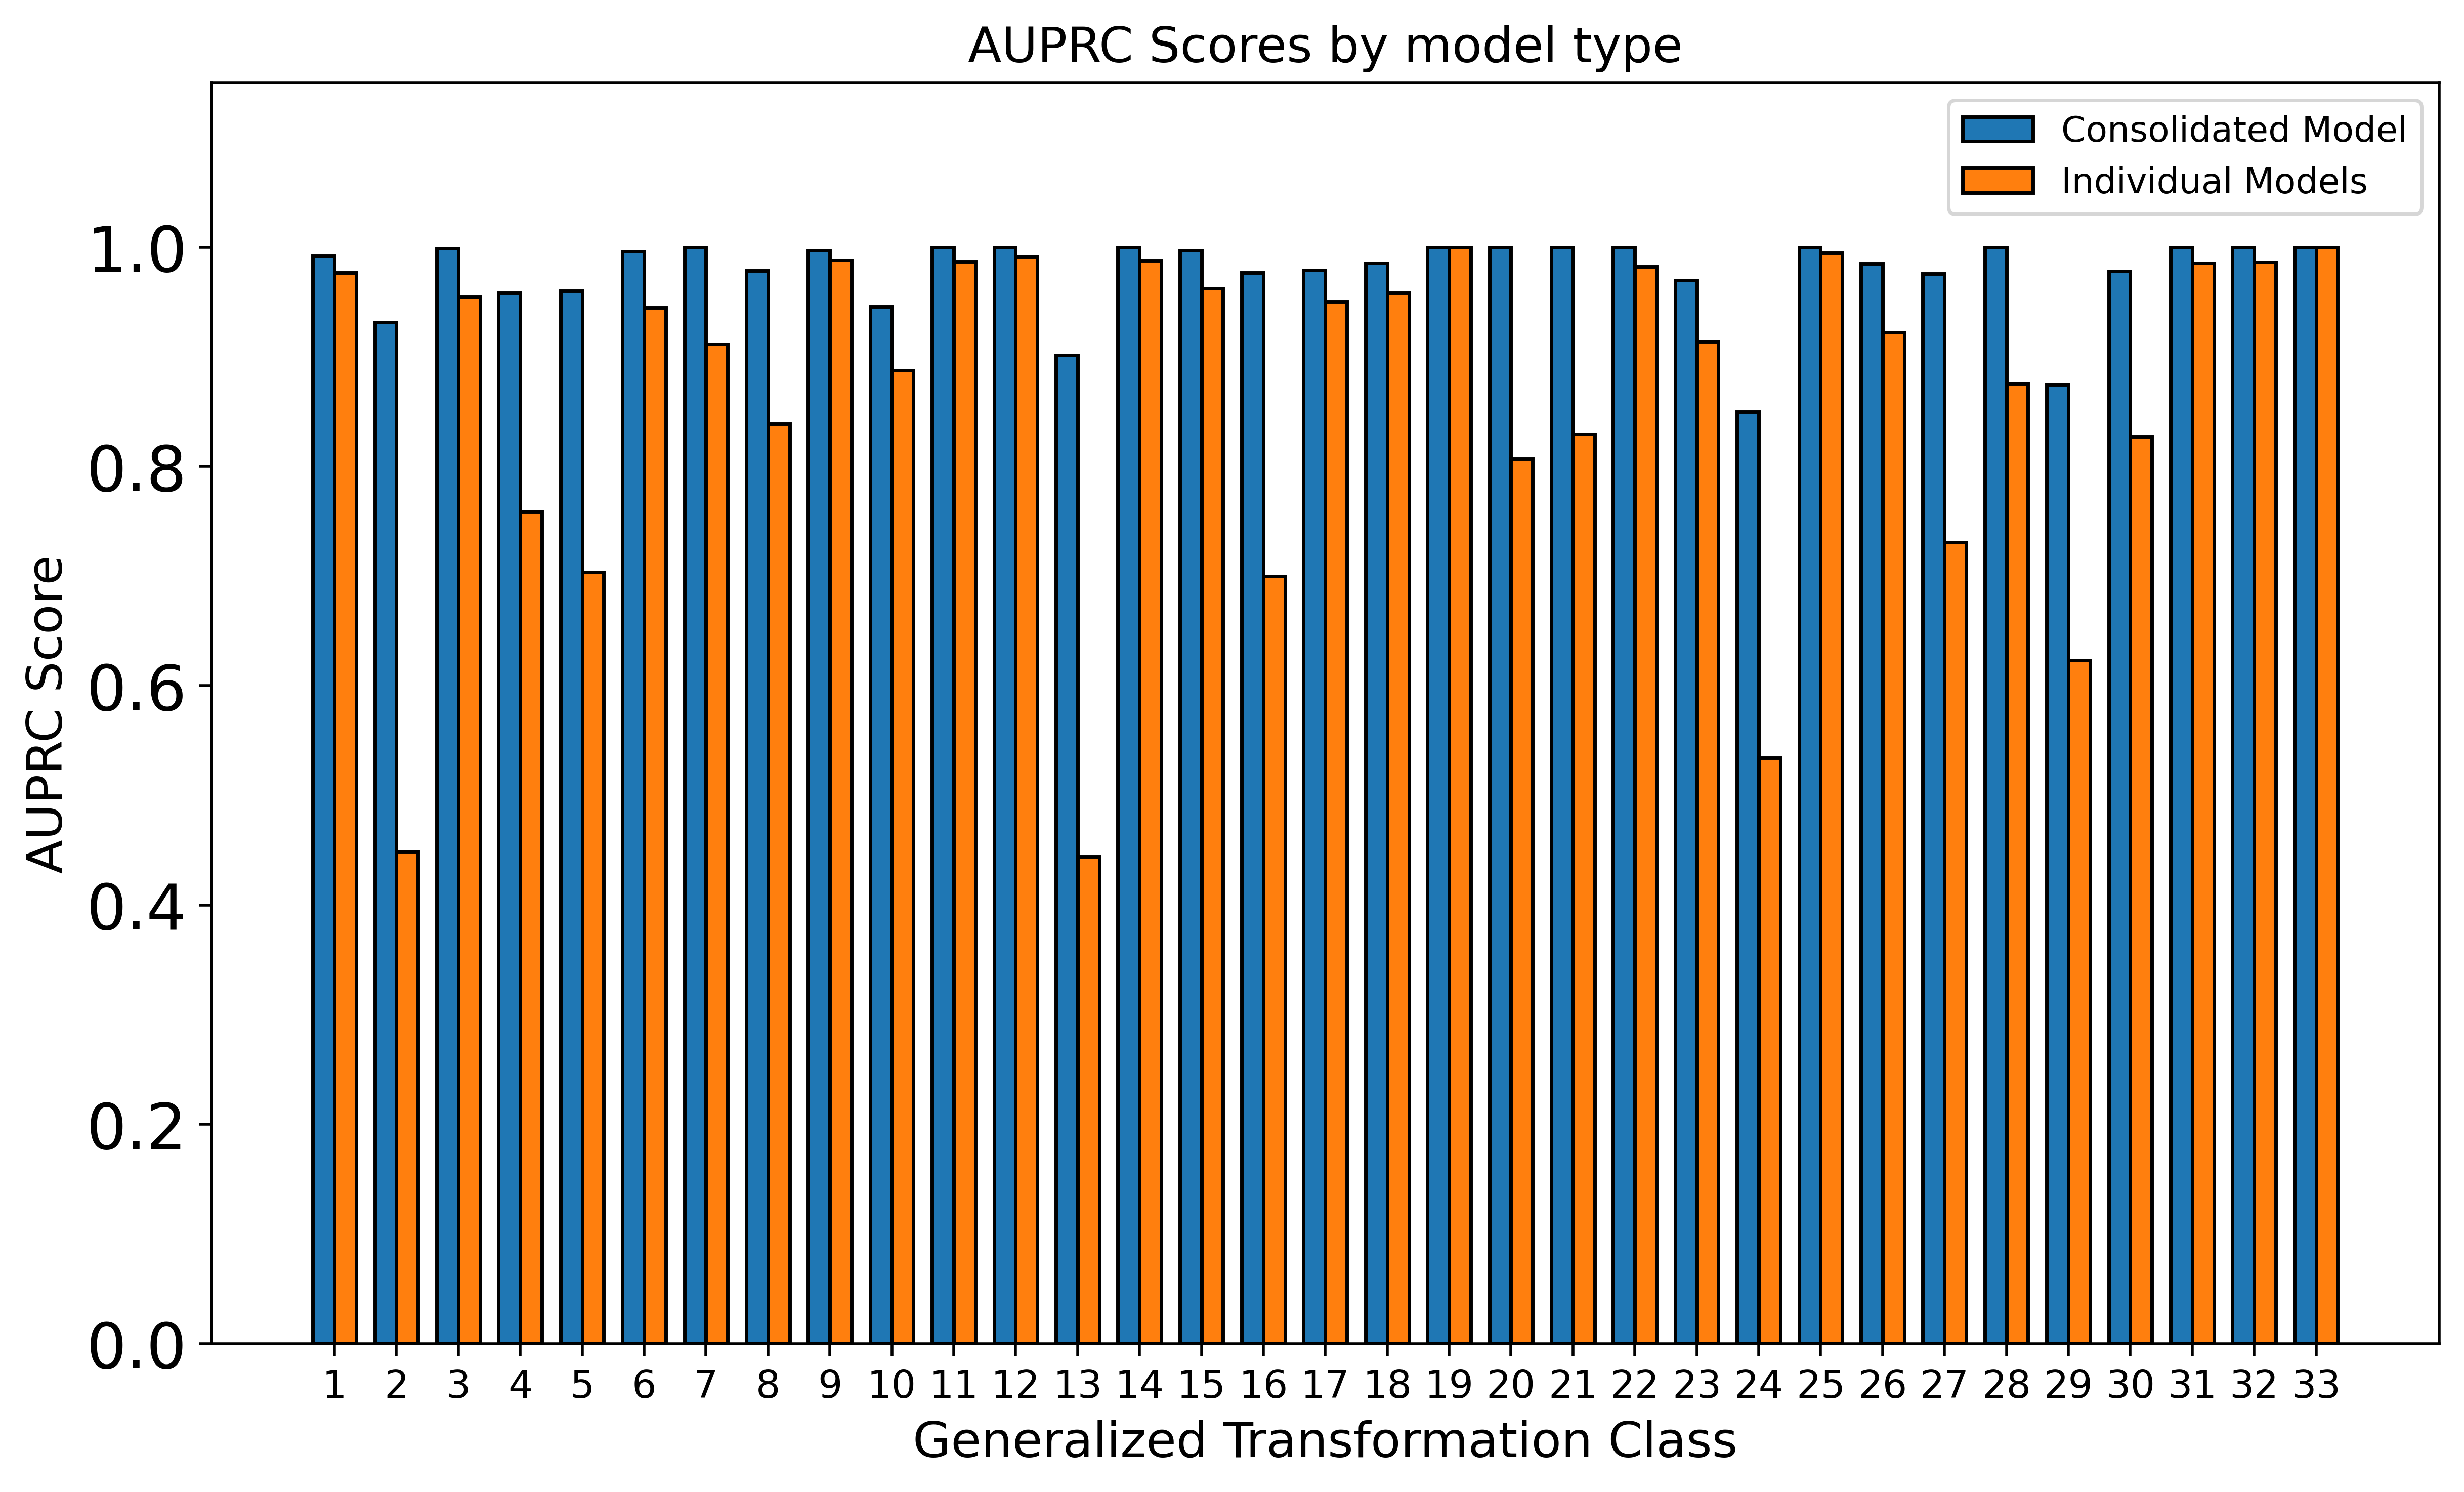

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
classes = np.arange(1, len(consolidated_model_scores)+1)  
consolidated_scores = np.random.uniform(0.8, 1.0, size=30)  # Random scores for consolidated model
individual_scores = np.random.uniform(0.7, 1.0, size=30)  # Random scores for individual models

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35  # Width of the bars

# Plotting both sets of data
rects1 = ax.bar(classes - bar_width/2, consolidated_model_scores, bar_width, label='Consolidated Model', color='tab:blue', edgecolor='k')
rects2 = ax.bar(classes + bar_width/2, indiv_model_scores, bar_width, label='Individual Models', color='tab:orange', edgecolor='k')

# Adding labels and title
ax.set_xlabel('Generalized Transformation Class',fontsize=14)
ax.set_ylabel('AUPRC Score',fontsize=14)
ax.set_title('AUPRC Scores by model type',fontsize=14)
ax.set_xticks(classes)
ax.set_xticklabels(classes, rotation=0, fontsize=11)  # Rotate class labels for better visibility
ax.set_ylim(0.7, 1.0)  # Adjust y-axis limits to match your data range
ax.legend()

# Show the plot
plt.tight_layout()
plt.ylim([0, 1.15])
plt.savefig('SI_fig8.png')
plt.show()